In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

pd.set_option('display.max_columns', None)

In [4]:
YEAR = 2020

df = pd.read_csv(
    'https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' \
    + str(YEAR) + '.csv.gz?raw=True',compression='gzip', low_memory=False
    )

In [5]:
ex = df[df['game_id'] == "2020_01_ARI_SF"].sort_values("play_id")

In [6]:
df[["yards_gained","ydstogo","air_yards"]].describe().round(2)

,yards_gained,ydstogo,air_yards
count,41366.00,43338.00,16891.00
mean,4.16,6.92,7.85
std,7.77,4.89,9.99
min,-30.00,0.00,-70.00
25%,0.00,2.00,1.00
50%,1.00,9.00,5.00
75%,6.00,10.00,12.00
max,98.00,42.00,60.00


In [7]:
df["air_yards"] = np.where(df["air_yards"]<-10, df["air_yards"].median(), df["air_yards"])

In [8]:
df[["yards_gained","ydstogo","air_yards"]].describe().round(2)

,yards_gained,ydstogo,air_yards
count,41366.00,43338.00,16891.00
mean,4.16,6.92,7.86
std,7.77,4.89,9.97
min,-30.00,0.00,-10.00
25%,0.00,2.00,1.00
50%,1.00,9.00,5.00
75%,6.00,10.00,12.00
max,98.00,42.00,60.00


In [9]:
cols = sorted(list(df.columns))

In [10]:
df["extra_point_result"].value_counts()

good       1159
failed       75
blocked      13
Name: extra_point_result, dtype: int64

In [11]:
ex

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assi

In [12]:
df["epa_rounded"] = df["epa"].apply(lambda epa: epa if pd.isnull(epa) else math.floor(epa))

df["epa_rounded"].value_counts().sort_values()

-11.0        4
-12.0        5
 7.0         6
-10.0       10
-9.0        16
-8.0        19
 6.0        33
-7.0        56
 5.0        64
 4.0       154
-6.0       156
-5.0       203
-4.0       329
 3.0       491
-3.0       493
 2.0      1523
-2.0      3421
 1.0      4389
 0.0     14686
-1.0     15277
Name: epa_rounded, dtype: int64

In [13]:
pd.set_option('display.max_rows', None)
df.groupby("epa_rounded")["play_type"].value_counts().to_frame()

play_type
epa_rounded play_type             
-12.0       pass                 4
            run                  1
-11.0       pass                 3
            run                  1
-10.0       pass                 9
            run                  1
-9.0        pass                12
            run                  3
            field_goal           1
-8.0        pass                15
            run                  3
            punt                 1
-7.0        pass                47
            run                  5
            kickoff              2
            punt                 2
-6.0        pass               106
            run                 39
            punt                 6
            kickoff              4
            no_play              1
-5.0        pass               151
            run                 32
            field_goal          13
            punt                 5
            qb_kneel             2
-4.0        pass               167
            field_goal          75
            run                 63
            qb_kneel            15
            punt                 7
            kickoff              1
            no_play              1
-3.0        pass               335
            run                 81
            field_goal          37
            qb_kneel            19
            no_play             10
            punt                10
            kickoff              1
-2.0        pass              2224
            run                724
            no_play            253
            punt               116
            qb_kneel            53
            kickoff             36
            field_goal          14
            qb_spike             1
-1.0        pass              6441
            run               6273
            punt               950
            no_play            819
            kickoff            550
            qb_kneel           104
            extra_point         87
            qb_spike            52
            field_goal           1
 0.0        pass              4016
            run               3914
            no_play           2315
            kickoff           1882
            extra_point       1143
            punt               607
            field_goal         579
            qb_kneel           200
            qb_spike            30
 1.0        pass              2756
            run               1070
            no_play            279
            field_goal         161
            kickoff             71
            punt                52
 2.0        pass              1099
            run                267
            no_play            121
            field_goal          24
            kickoff             12
 3.0        pass               399
            run                 63
            no_play             24
            kickoff              4
            field_goal           1
 4.0        pass               114
            run                 26
            punt                 7
            no_play              6
            kickoff              1
 5.0        pass                41
            punt                 9
            run                  9
            kickoff              5
 6.0        pass                23
            run                  7
            kickoff              2
            punt                 1
 7.0        pass                 3
            run                  2
            punt                 1

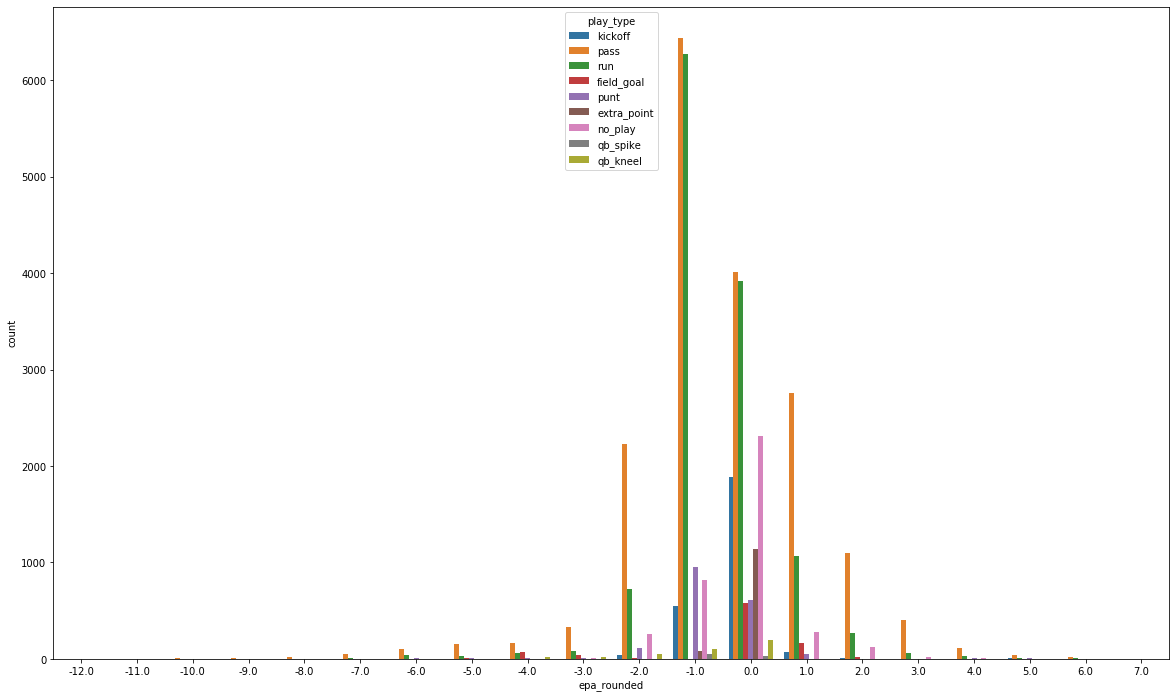

In [14]:
plt.figure(figsize=(20,12))
sns.countplot(x="epa_rounded", data=df, hue="play_type")

In [15]:
pd.set_option('display.max_colwidth', None)
df[df["epa_rounded"] > 4][["game_id","epa_rounded","desc"]].sort_values("epa_rounded")

,game_id,epa_rounded,desc
15,2020_01_ARI_SF,5.0,"(10:05) (Shotgun) 10-J.Garoppolo pass short middle to 31-R.Mostert for 76 yards, TOUCHDOWN. Caught at SF 29, 71-YAC"
26049,2020_10_SF_NO,5.0,"(4:48) 6-M.Wishnowsky punts 43 yards to NO 44, Center-46-T.Pepper. 11-D.Harris MUFFS catch, RECOVERED by SF-36-M.Harris at NO 49."
25597,2020_10_MIN_CHI,5.0,(3:31) (Shotgun) 8-K.Cousins pass deep middle to 18-J.Jefferson to CHI 32 for 54 yards (33-J.Johnson).
25563,2020_10_MIN_CHI,5.0,"5-D.Bailey kicks 69 yards from MIN 35 to CHI -4. 84-C.Patterson for 104 yards, TOUCHDOWN."
24961,2020_10_HOU_CLE,5.0,(1:07) 24-N.Chubb left end ran ob at HOU 1 for 59 yards.
24416,2020_10_BUF_ARI,5.0,"(:11) (Shotgun) 1-K.Murray pass deep left to 10-D.Hopkins for 43 yards, TOUCHDOWN."
23633,2020_09_NYG_WAS,5.0,"(10:35) (Shotgun) 11-A.Smith pass deep left to 17-T.McLaurin for 68 yards, TOUCHDOWN."
23523,2020_09_NYG_WAS,5.0,"(5:26) 9-R.Dixon punts 49 yards to WAS 15, Center-58-C.Kreiter. 83-I.Wright MUFFS catch, and recovers at WAS 15. 83-I.Wright to WAS 15 for no gain (47-C.Brown). FUMBLES (47-C.Brown), RECOVERED by NYG-45-M.Harper at WAS 16."
23026,2020_09_MIA_ARI,5.0,"(14:31) (Shotgun) 1-K.Murray pass deep middle to 13-C.Kirk for 56 yards, TOUCHDOWN."
22941,2020_09_LV_LAC,5.0,"(8:20) 6-A.Cole punts 42 yards to LAC 30, Center-47-T.Sieg. 84-K.Hill Jr. MUFFS catch, RECOVERED by LV-58-K.Wilber at LAC 31."
